# Bernstein-Vazirani Algorithm

This quantum algorithm is used to find a secret $n$ bit string $s$ provided we are given a phase oracle $U$ for the function f which computes the bitwise product of the $n$ bit input $x$ and $s$, that is, $f(x)=s.x(mod 2)$. The oracle given to us implements $U|x\rangle =(-1)^{f(x)}|x\rangle =(-1)^{s.x}|x\rangle$ for all basis states $|x\rangle$. This algorithm allows us to determine $s$ from $U$ with a single use of $U$. 

In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram,plot_state_qsphere, plot_bloch_multivector, plot_state_city

First we input n.

In [2]:
n = int(input("Number of bits n = "))

Number of bits n = 4


Now we input the secret string s, but its only purpose will be to implement the oracle and finally the oracle will be used to determine s in the algorithm.

In [3]:
s = input("Secret n bit string = ")

Secret n bit string = 0101


Now the n qubit quantum circuit is implemented. We start with applying hadamard gates to all qubits. This will be followed by implementation of the oracle in the subsequent cell.

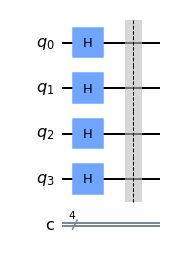

In [4]:
qc = QuantumCircuit(n,n);
for i in range(n):
    qc.h(i)
qc.barrier()
qc.draw('mpl')

Below is the oracle implementation which can be thought of as a black box here and hence it is enclosed within barriers to maintain clarity in the following circuit.

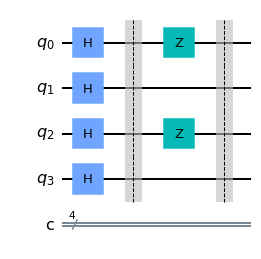

In [5]:
for i in range(n):
    if s[n-i-1] == '1':
        qc.z(i)
qc.barrier()
qc.draw('mpl')

After applying the oracle on the qubits, once again hadamard gate is applied to all qubits. Then the qubits are all measured and the secret string s is stored in the classical bits as the measurement result. The complete circuit for the algorithm is shown below.

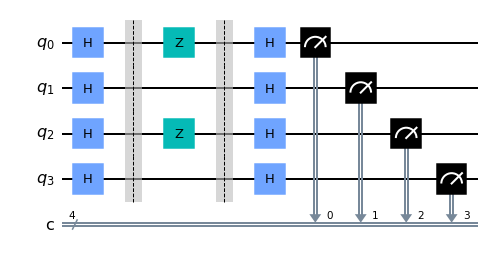

In [6]:
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i,i)
qc.draw('mpl')

Let us now run a simulation of the circuit to see the resulting measurement outcome.

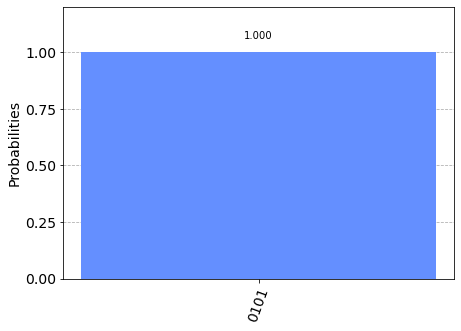

In [7]:
sim = Aer.get_backend('qasm_simulator')
job = execute(qc,sim,shots=1)
result = job.result()
count = result.get_counts()

plot_histogram(count)

The result plotted in the above histogram matches the secret string supplied and the algorithm runs successfully.